At very low energy $E<V_0$ there should be a singularity in the deflection function at some critical impact parameter that goes to minus infinity. As $E$ increases this sigularity should gradually dissappaer and the function becomes analytic. At very high energy $E>>V_0$ where the potential can be ignored, the object being scattered is just going to fly out regardless of the potential.

In [1]:
class scattering(object):
    
    def __init__(self, mass=1., x=0., y=0., vx=0., vy=0.):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
       
    def euler(self, fx, fy, dt):
        self.vx = self.vx + fx/self.mass*dt
        self.vy = self.vy + fy/self.mass*dt
        self.x = self.x + self.vx*dt
        self.y = self.y + self.vy*dt

theta(Degree)     cross section
180.926422512     -0.0
175.550573452     -0.00193827354204
170.163020942     -0.0100430703838
164.757742304     0.0112284944567
159.328509028     0.00748295228279
153.869089833     0.0117600611125
148.373018003     0.158455579465
142.832923777     -0.0192022981508
137.241898209     -0.0143949241884
131.591705522     -0.0190756646397
125.874268796     -0.0502936485714
120.080013265     0.0908296512747
114.199245477     0.0316939534735
108.220889715     0.0243759556088
102.132619692     0.0233079982742
95.9207665553     0.0241588851748
89.5698979101     0.0253255252913
83.0624232239     0.0261393662537
76.3781393595     0.0274211756025
69.493627704     0.0332327870795
62.381377194     0.0760815183156
55.0087786183     -0.0654208645508
47.3366800364     -0.0286890369577
39.3173668381     -0.135806759035
30.8917747223     0.0285167534341
21.985449344     -0.0560861599453
12.5025223548     4.81079689109
2.31643343871     -0.415434301279
-8.74497931514     0.0

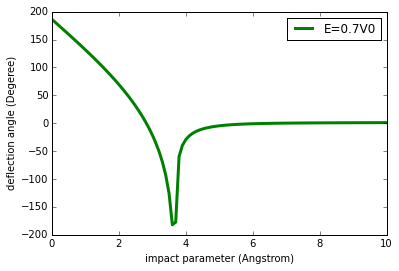

In [80]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
from matplotlib.colors import ColorConverter as cc
import math 

#E < V0

mass = 1.                #mass
V0 = 30.                 #depth of repulsive potential 
E = 21.                  #kinetic energy
b = 0                    #initial impact parameter
db = 0.1                 #increment in impact parameter
bsteps = int(rmax/db)    
rmax = 10.               #upperbound of impact parameter

impact = []
deflection = []

while b < rmax:
    x0 = -100               #initial position
    y0 = b                   #initial y position
    v0x = math.sqrt(2*E/mass)#initial x velocity
    v0y = 0                  #initial y velocity 

    dt = 0.01                # time step
    tmax = 100.
    nsteps = int(tmax/dt)

    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    vx = np.zeros(nsteps) 
    vy = np.zeros(nsteps)
    #energy = np.zeros(nsteps)

    x[0] = x0
    y[0] = y0
    vx[0] = v0x
    vy[0] = v0y
    #energy[0] = E


    s = scattering(1., x0, y0, v0x, v0y)

    for i in range(1,nsteps):        
        a = 2.05
        fx = -4*V0*((-12*s.x)*(a**12)/((s.x**2+s.y**2)**7)+(6*s.x)*(a**6)/((s.x**2+s.y**2)**4))
        fy = -4*V0*((-12*s.y)*(a**12)/((s.x**2+s.y**2)**7)+(6*s.y)*(a**6)/((s.x**2+s.y**2)**4))
        s.euler(fx, fy, dt)

        x[i] = s.x
        y[i] = s.y
        vx[i] = s.vx
        vy[i] = s.vy
        #energy[i] = (s.vx**2+s.vy**2)/2/s.mass

    theta = math.atan2(y[nsteps-1], x[nsteps-1])*59.3
    impact.append(b)
    deflection.append(theta)
    b += db

#t = np.linspace(0.,tmax,nsteps)  
  
cs = [] #cross section
cstheta = [] #corresponding theta value for cross section
cs.append('cross section')
cstheta.append('theta(Degree)')

for j in range(0, bsteps-1):
    cs.append((impact[j] / math.sin(deflection[j]))*abs(db / (deflection[j+1]-deflection[j]))) #calculate cross section
    cstheta.append(deflection[j+1]) 
    print cstheta[j],"   ", cs[j]
    

pyplot.plot(impact, deflection, color='green', label = 'E=0.7V0', ls='-', lw=3)

pyplot.xlabel('impact parameter (Angstrom)')
pyplot.ylabel('deflection angle (Degeree)')
pyplot.legend(loc = 'upper right');  #legend is E/V0 ratio

theta(Degree)     cross section
180.705361734     -0.0
175.107475483     -0.00179002862541
169.49591044     -0.0048668612495
163.863747968     -0.0356219683455
158.204047313     0.0147165792259
152.509323103     0.00973382485212
146.77119246     0.0105628010853
140.98203652     0.0156410387178
135.133265514     0.0360092898262
129.214519258     -0.339672347864
123.216740721     -0.0419026879744
117.127661016     -0.0282223918369
110.935520634     -0.0249646603424
104.626488788     -0.024814591044
98.184730586     -0.026643747996
91.5927826225     -0.0318646860747
84.8304826277     -0.0505979610848
77.8743866561     -3.266847569
70.6970356694     0.0406203502898
63.2658615026     0.0255695688472
55.5417244551     0.0615747553654
47.4768958022     -0.0308080033677
39.0121103067     -0.075176518761
30.0724286431     0.0266072551894
20.5609082536     -0.0258987064916
10.3487891389     0.0247245443095
-0.740526581873     -0.0293800112815
-12.9590531174     -0.0327528598754
-26.6850925504   

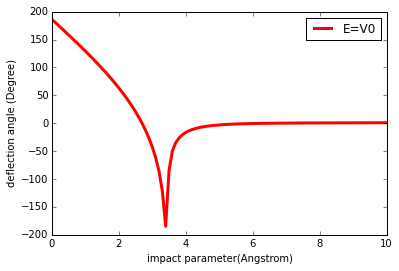

In [81]:
# E = V0

mass = 1.                #mass
V0 = 30.                 #depth of repulsive potential 
E = 30.                  #kinetic energy
b = 0                    #initial impact parameter
db = 0.1                 #increment in impact parameter
bsteps = int(rmax/db)    
rmax = 10.               #upperbound of impact parameter

impact = []
deflection = []

while b < rmax:
    x0 = -100               #initial position
    y0 = b                   #initial y position
    v0x = math.sqrt(2*E/mass)#initial x velocity
    v0y = 0                  #initial y velocity 

    dt = 0.01                # time step
    tmax = 100.
    nsteps = int(tmax/dt)

    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    vx = np.zeros(nsteps) 
    vy = np.zeros(nsteps)
    #energy = np.zeros(nsteps)

    x[0] = x0
    y[0] = y0
    vx[0] = v0x
    vy[0] = v0y
    #energy[0] = E


    s = scattering(1., x0, y0, v0x, v0y)

    for i in range(1,nsteps):        
        a = 2.05
        fx = -4*V0*((-12*s.x)*(a**12)/((s.x**2+s.y**2)**7)+(6*s.x)*(a**6)/((s.x**2+s.y**2)**4))
        fy = -4*V0*((-12*s.y)*(a**12)/((s.x**2+s.y**2)**7)+(6*s.y)*(a**6)/((s.x**2+s.y**2)**4))
        s.euler(fx, fy, dt)

        x[i] = s.x
        y[i] = s.y
        vx[i] = s.vx
        vy[i] = s.vy
        #energy[i] = (s.vx**2+s.vy**2)/2/s.mass

    theta = math.atan2(y[nsteps-1], x[nsteps-1])*59.3
    impact.append(b)
    deflection.append(theta)
    b += db

#t = np.linspace(0.,tmax,nsteps)  
  
cs = [] #cross section
cstheta = [] #corresponding theta value for cross section
cs.append('cross section')
cstheta.append('theta(Degree)')

for j in range(0, bsteps-1):
    cs.append((impact[j] / math.sin(deflection[j]))*abs(db / (deflection[j+1]-deflection[j]))) #calculate cross section
    cstheta.append(deflection[j+1]) 
    print cstheta[j],"   ", cs[j]
    

pyplot.plot(impact, deflection, color='red',label = 'E=V0', ls='-', lw=3)

pyplot.xlabel('impact parameter(Angstrom)')
pyplot.ylabel('deflection angle (Degree)')
pyplot.legend(loc = 'upper right');        #legend is E/V0 ratio


theta(Degree)     cross section
180.291959389     -0.0
174.278514772     -0.00177002031897
168.247397222     -0.00332674235752
162.190418148     -0.00502730870651
156.099155708     -0.00712476452428
149.962275236     -0.0098072041246
143.766047524     -0.0130724720923
137.502898026     -0.0164457298167
131.16605015     -0.0189910418373
124.733446832     -0.0198773645539
118.195597667     -0.0190771118412
111.537919088     -0.0178335755576
104.738743984     -0.0176503426784
97.7812106701     -0.0213451791777
90.6408110841     -0.0513415950423
83.2898018543     0.045470672803
75.6976733428     0.0210893620078
67.826001956     0.0732096272681
59.6289018952     -0.0228604270437
51.0502943959     0.361188946327
42.0202510028     0.0313407871366
32.450182724     -0.0237371589579
22.2260179224     0.0250355917016
11.198812571     -0.0896264667787
-0.826757793053     -0.0203768681577
-14.0994124408     -0.0256010745904
-28.8856107737     -0.0175965049676
-45.184116457     0.0288648605627
-61.0

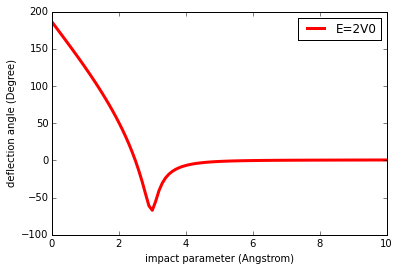

In [82]:
#E > V0

mass = 1.                #mass
V0 = 30.                 #depth of repulsive potential 
E = 60.                  #kinetic energy
b = 0                    #initial impact parameter
db = 0.1                 #increment in impact parameter
bsteps = int(rmax/db)    
rmax = 10.               #upperbound of impact parameter

impact = []
deflection = []

while b < rmax:
    x0 = -100               #initial position
    y0 = b                   #initial y position
    v0x = math.sqrt(2*E/mass)#initial x velocity
    v0y = 0                  #initial y velocity 

    dt = 0.01                # time step
    tmax = 100.
    nsteps = int(tmax/dt)

    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    vx = np.zeros(nsteps) 
    vy = np.zeros(nsteps)
    #energy = np.zeros(nsteps)

    x[0] = x0
    y[0] = y0
    vx[0] = v0x
    vy[0] = v0y
    #energy[0] = E


    s = scattering(1., x0, y0, v0x, v0y)

    for i in range(1,nsteps):        
        a = 2.05
        fx = -4*V0*((-12*s.x)*(a**12)/((s.x**2+s.y**2)**7)+(6*s.x)*(a**6)/((s.x**2+s.y**2)**4))
        fy = -4*V0*((-12*s.y)*(a**12)/((s.x**2+s.y**2)**7)+(6*s.y)*(a**6)/((s.x**2+s.y**2)**4))
        s.euler(fx, fy, dt)

        x[i] = s.x
        y[i] = s.y
        vx[i] = s.vx
        vy[i] = s.vy
        #energy[i] = (s.vx**2+s.vy**2)/2/s.mass

    theta = math.atan2(y[nsteps-1], x[nsteps-1])*59.3
    impact.append(b)
    deflection.append(theta)
    b += db

#t = np.linspace(0.,tmax,nsteps)  
  
cs = [] #cross section
cstheta = [] #corresponding theta value for cross section
cs.append('cross section')
cstheta.append('theta(Degree)')

for j in range(0, bsteps-1):
    cs.append((impact[j] / math.sin(deflection[j]))*abs(db / (deflection[j+1]-deflection[j]))) #calculate cross section
    cstheta.append(deflection[j+1]) 
    print cstheta[j],"   ", cs[j]
    

pyplot.plot(impact, deflection, color='red',label = 'E=2V0', ls='-', lw=3)

pyplot.xlabel('impact parameter (Angstrom)')
pyplot.ylabel('deflection angle (Degree)')
pyplot.legend(loc = 'upper right'); 


theta(Degree)     cross section
179.79347477     -0.0
173.283014758     -0.00232230552099
166.751016744     -0.00644057492958
160.171145861     -0.0186771637011
153.510006487     0.119959121073
146.75785651     0.0178399423181
139.960749121     0.0112959247029
133.159601559     0.0104253347427
126.256270216     0.0123734656482
119.116764199     0.0225714319887
111.848891005     -0.0527759985084
104.510362916     -0.0158033659283
96.8997469695     -0.0212162919614
89.0966857421     0.0354248285132
81.0507266187     0.0192201367207
72.7069026848     -0.0304858246412
64.0398430807     -0.0424179042454
54.9968694154     0.020108069778
45.5258059288     -0.0190086876964
35.5795590982     0.0191097972098
25.1247599046     -0.0224221242866
14.1844960536     -2.40503366194
2.93420467827     0.0195769716341
-8.0793950408     0.101422100916
-17.575169181     -0.0259303931691
-23.5202536357     0.043968974038
-24.6980816836     0.220937279646
-22.4210373226     0.281582299704
-18.9441649054     0

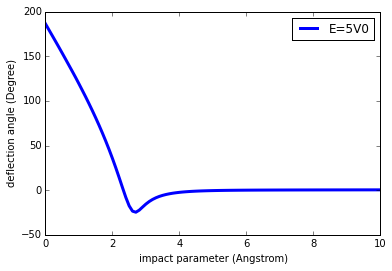

In [83]:
mass = 1.                #mass
V0 = 30.                 #depth of repulsive potential 
E = 150.                  #kinetic energy
b = 0                    #initial impact parameter
db = 0.1                 #increment in impact parameter
bsteps = int(rmax/db)    
rmax = 10.               #upperbound of impact parameter

impact = []
deflection = []

while b < rmax:
    x0 = -100               #initial position
    y0 = b                   #initial y position
    v0x = math.sqrt(2*E/mass)#initial x velocity
    v0y = 0                  #initial y velocity 

    dt = 0.01                # time step
    tmax = 100.
    nsteps = int(tmax/dt)

    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    vx = np.zeros(nsteps) 
    vy = np.zeros(nsteps)
    #energy = np.zeros(nsteps)

    x[0] = x0
    y[0] = y0
    vx[0] = v0x
    vy[0] = v0y
    #energy[0] = E


    s = scattering(1., x0, y0, v0x, v0y)

    for i in range(1,nsteps):        
        a = 2.05
        fx = -4*V0*((-12*s.x)*(a**12)/((s.x**2+s.y**2)**7)+(6*s.x)*(a**6)/((s.x**2+s.y**2)**4))
        fy = -4*V0*((-12*s.y)*(a**12)/((s.x**2+s.y**2)**7)+(6*s.y)*(a**6)/((s.x**2+s.y**2)**4))
        s.euler(fx, fy, dt)

        x[i] = s.x
        y[i] = s.y
        vx[i] = s.vx
        vy[i] = s.vy
        #energy[i] = (s.vx**2+s.vy**2)/2/s.mass

    theta = math.atan2(y[nsteps-1], x[nsteps-1])*59.3
    impact.append(b)
    deflection.append(theta)
    b += db

#t = np.linspace(0.,tmax,nsteps)  
  
cs = [] #cross section
cstheta = [] #corresponding theta value for cross section
cs.append('cross section')
cstheta.append('theta(Degree)')

for j in range(0, bsteps-1):
    cs.append((impact[j] / math.sin(deflection[j]))*abs(db / (deflection[j+1]-deflection[j]))) #calculate cross section
    cstheta.append(deflection[j+1]) 
    print cstheta[j],"   ", cs[j]
    

pyplot.plot(impact, deflection, color='blue',label = 'E=5V0', ls='-', lw=3)

pyplot.xlabel('impact parameter (Angstrom)')
pyplot.ylabel('deflection angle (Degree)')
pyplot.legend(loc = 'upper right');   #legend is E/V0 ratio


theta(Degree)     cross section
180.339621657     -0.0
174.199636085     -0.00170584653961
167.611825461     -0.00307457372077
160.152670349     -0.0044960264624
151.287809351     0.0658702427002
141.124430646     0.0104267497496
131.984659772     0.0268245809295
126.125807975     0.316417942458
121.892857938     0.0423913347686
116.226539307     0.026987538426
106.83865061     0.859827381691
94.3295265778     0.358951910292
84.3860797221     0.147793873754
77.2091372789     0.0428062238574
67.7908787491     0.0153038086254
57.0882598575     -0.0144526112353
47.2290722609     0.0315861370741
36.9497038624     -0.157521655061
26.6100386868     -0.0255557072889
16.7407601513     0.0193361175132
7.96365381024     -0.0265350070404
1.10208761289     0.0307902442403
-3.31962075323     0.0557690904456
-5.46715175082     0.604778517253
-6.03788887975     0.577277793179
-5.76405613312     3.75947712028
-5.141005057     0.841122517553
-4.43201870801     0.418700259316
-3.75568107126     0.430816

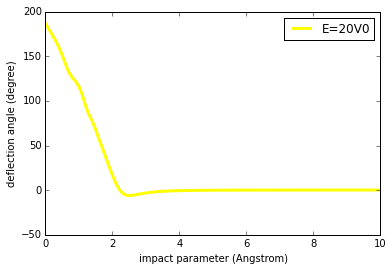

In [84]:
#E >> V0

mass = 1.                #mass
V0 = 30.                 #depth of repulsive potential 
E = 600.                  #kinetic energy
b = 0                    #initial impact parameter
db = 0.1                 #increment in impact parameter
bsteps = int(rmax/db)    
rmax = 10.               #upperbound of impact parameter

impact = []
deflection = []

while b < rmax:
    x0 = -100               #initial position
    y0 = b                   #initial y position
    v0x = math.sqrt(2*E/mass)#initial x velocity
    v0y = 0                  #initial y velocity 

    dt = 0.01                # time step
    tmax = 100.
    nsteps = int(tmax/dt)

    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    vx = np.zeros(nsteps) 
    vy = np.zeros(nsteps)
    #energy = np.zeros(nsteps)

    x[0] = x0
    y[0] = y0
    vx[0] = v0x
    vy[0] = v0y
    #energy[0] = E


    s = scattering(1., x0, y0, v0x, v0y)

    for i in range(1,nsteps):        
        a = 2.05
        fx = -4*V0*((-12*s.x)*(a**12)/((s.x**2+s.y**2)**7)+(6*s.x)*(a**6)/((s.x**2+s.y**2)**4))
        fy = -4*V0*((-12*s.y)*(a**12)/((s.x**2+s.y**2)**7)+(6*s.y)*(a**6)/((s.x**2+s.y**2)**4))
        s.euler(fx, fy, dt)

        x[i] = s.x
        y[i] = s.y
        vx[i] = s.vx
        vy[i] = s.vy
        #energy[i] = (s.vx**2+s.vy**2)/2/s.mass

    theta = math.atan2(y[nsteps-1], x[nsteps-1])*59.3
    impact.append(b)
    deflection.append(theta)
    b += db

#t = np.linspace(0.,tmax,nsteps)  
  
cs = [] #cross section
cstheta = [] #corresponding theta value for cross section
cs.append('cross section')
cstheta.append('theta(Degree)')

for j in range(0, bsteps-1):
    cs.append((impact[j] / math.sin(deflection[j]))*abs(db / (deflection[j+1]-deflection[j]))) #calculate cross section
    cstheta.append(deflection[j+1]) 
    print cstheta[j],"   ", cs[j]
    

pyplot.plot(impact, deflection, color='yellow',label = 'E=20V0', ls='-', lw=3)

pyplot.xlabel('impact parameter (Angstrom)')
pyplot.ylabel('deflection angle (degree)')
pyplot.legend(loc = 'upper right');   #legend is E/V0 ratio


theta(Degree)     cross section
177.250701764     -0.0
166.55113066     0.000964427828421
153.223085317     -0.0321305766346
143.382005144     0.00464997542733
144.662395633     -0.0345218488073
146.629006484     0.171114654416
144.762045369     0.0375812780064
141.032089422     0.0762188445241
136.644030899     0.0547336678237
131.867594994     -0.0188446924592
126.266014114     -0.225367267777
118.440115929     0.0248098108805
105.026035643     -0.0110743486654
79.8240355545     -0.00528257117588
48.62789442     -0.0046785392024
35.8518850622     -0.011766992634
28.8795957061     -0.0238535683839
19.3538205379     -0.0313655980357
10.7522413398     0.0433111779802
4.96807637199     -0.0338453759809
1.60705668072     -0.0615053082628
-0.125379243468     0.121296336639
-0.898538459324     -2.27544605515
-1.16277751823     -1.11248004701
-1.18001997365     -15.1639597574
-1.08936537109     -2.98256463236
-0.96040059734     -2.27460094758
-0.826090552733     -2.45328524513
-0.70085355434

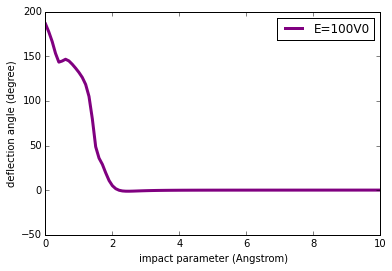

In [85]:
mass = 1.                #mass
V0 = 30.                 #depth of repulsive potential 
E = 3000.                  #kinetic energy
b = 0                    #initial impact parameter
db = 0.1                 #increment in impact parameter
bsteps = int(rmax/db)    
rmax = 10.               #upperbound of impact parameter

impact = []
deflection = []

while b < rmax:
    x0 = -100               #initial position
    y0 = b                   #initial y position
    v0x = math.sqrt(2*E/mass)#initial x velocity
    v0y = 0                  #initial y velocity 

    dt = 0.01                # time step
    tmax = 100.
    nsteps = int(tmax/dt)

    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    vx = np.zeros(nsteps) 
    vy = np.zeros(nsteps)
    #energy = np.zeros(nsteps)

    x[0] = x0
    y[0] = y0
    vx[0] = v0x
    vy[0] = v0y
    #energy[0] = E


    s = scattering(1., x0, y0, v0x, v0y)

    for i in range(1,nsteps):        
        a = 2.05
        fx = -4*V0*((-12*s.x)*(a**12)/((s.x**2+s.y**2)**7)+(6*s.x)*(a**6)/((s.x**2+s.y**2)**4))
        fy = -4*V0*((-12*s.y)*(a**12)/((s.x**2+s.y**2)**7)+(6*s.y)*(a**6)/((s.x**2+s.y**2)**4))
        s.euler(fx, fy, dt)

        x[i] = s.x
        y[i] = s.y
        vx[i] = s.vx
        vy[i] = s.vy
        #energy[i] = (s.vx**2+s.vy**2)/2/s.mass

    theta = math.atan2(y[nsteps-1], x[nsteps-1])*59.3
    impact.append(b)
    deflection.append(theta)
    b += db

#t = np.linspace(0.,tmax,nsteps)  
  
cs = [] #cross section
cstheta = [] #corresponding theta value for cross section
cs.append('cross section')
cstheta.append('theta(Degree)')

for j in range(0, bsteps-1):
    cs.append((impact[j] / math.sin(deflection[j]))*abs(db / (deflection[j+1]-deflection[j]))) #calculate cross section
    cstheta.append(deflection[j+1]) 
    print cstheta[j],"   ", cs[j]
    

pyplot.plot(impact, deflection, color='purple',label = 'E=100V0', ls='-', lw=3)

pyplot.xlabel('impact parameter (Angstrom)')
pyplot.ylabel('deflection angle (degree)')
pyplot.legend(loc = 'upper right');  #legend is E/V0 ratio


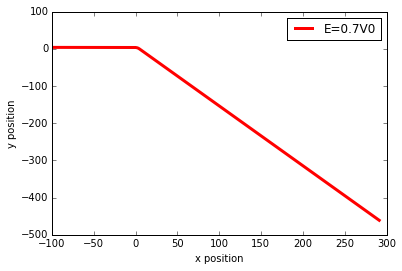

In [95]:
#trjectories about the critical impact parameter
mass = 1.                #mass
V0 = 30.                 #depth of repulsive potential 
E = 21.                  #kinetic energy
b = 3.8                  #critical impact parameter 

x0 = -100               #initial position
y0 = b                   #initial y position
v0x = math.sqrt(2*E/mass)#initial x velocity
v0y = 0                  #initial y velocity 

dt = 0.01                # time step
tmax = 100.
nsteps = int(tmax/dt)

x = np.zeros(nsteps)
y = np.zeros(nsteps)
vx = np.zeros(nsteps) 
vy = np.zeros(nsteps)

x[0] = x0
y[0] = y0
vx[0] = v0x
vy[0] = v0y

s = scattering(1., x0, y0, v0x, v0y)

for i in range(1,nsteps):        
    a = 2.05
    fx = -4*V0*((-12*s.x)*(a**12)/((s.x**2+s.y**2)**7)+(6*s.x)*(a**6)/((s.x**2+s.y**2)**4))
    fy = -4*V0*((-12*s.y)*(a**12)/((s.x**2+s.y**2)**7)+(6*s.y)*(a**6)/((s.x**2+s.y**2)**4))
    s.euler(fx, fy, dt)

    x[i] = s.x
    y[i] = s.y
    vx[i] = s.vx
    vy[i] = s.vy
    

pyplot.plot(x, y, color='r', label='E=0.7V0', ls='-', lw=3)

pyplot.xlabel('x position')
pyplot.ylabel('y position')
pyplot.legend(loc='upper right');


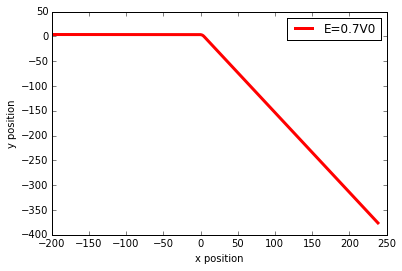

In [66]:
#trjectories about the critical impact parameter
mass = 1.                #mass
V0 = 30.                 #depth of repulsive potential 
E = 21.                  #kinetic energy
b = 3.8                  #critical impact parameter 

x0 = -200.               #initial position
y0 = b                   #initial y position
v0x = math.sqrt(2*E/mass)#initial x velocity
v0y = 0                  #initial y velocity 

dt = 0.01                # time step
tmax = 100.
nsteps = int(tmax/dt)

x = np.zeros(nsteps)
y = np.zeros(nsteps)
vx = np.zeros(nsteps) 
vy = np.zeros(nsteps)

x[0] = x0
y[0] = y0
vx[0] = v0x
vy[0] = v0y

s = scattering(1., x0, y0, v0x, v0y)

for i in range(1,nsteps):        
    a = 2.05
    fx = -4*V0*((-12*s.x)*(a**12)/((s.x**2+s.y**2)**7)+(6*s.x)*(a**6)/((s.x**2+s.y**2)**4))
    fy = -4*V0*((-12*s.y)*(a**12)/((s.x**2+s.y**2)**7)+(6*s.y)*(a**6)/((s.x**2+s.y**2)**4))
    s.euler(fx, fy, dt)

    x[i] = s.x
    y[i] = s.y
    vx[i] = s.vx
    vy[i] = s.vy
    

pyplot.plot(x, y, color='r', label='E=0.7V0', ls='-', lw=3)

pyplot.xlabel('x position')
pyplot.ylabel('y position')
pyplot.legend(loc='upper right');


Finding the maximum energy E for orbiting:

First rewrite the potential in terms of $r_{min}$:
$$V(r) = V_0[(\frac{r_{min}}{r})^{12} - 2(\frac{r_{min}}{r})^6]$$
and by writing the angular momentum as a dimentionless quantity A, write the effective potential as:
$$V(r)_{eff} = V_0[(\frac{r_{min}}{r})^{12} - 2(\frac{r_{min}}{r})^6 +A^2(\frac{r_{min}}{r})^2]$$
where $$A = \frac{L}{r_{min}\sqrt{2mV_{0}}} = \frac{b}{r_{min}}\sqrt{\frac{E}{V_{0}}}$$
and L is the angular momentum. Here $A^2$ is the ratio of the centrifgual potential at $r_{min}$ to the depth of the potential $V_{0}$. 

Next solve the limiting coditions on the derivatives of $V(r)_{eff}$:
$$V'(r_{orb})_{eff} = 0$$
$$V''(r_{orb})_{eff} = 0$$
where $r_{orb}$ is the orbiting radius. The above set of equations yield the conditions $\frac{r_{orb}}{r_{min}}=(\frac{5}{2})^{1/6}$, $A^2_{abs}=\frac{18}{5}(\frac{2}{5})^{2/3}$ and $V(r_{orb})_{eff}=\frac{4V_{0}}{5}$.

Therefore the maximum energy for orbiting is the energy when orbiting occurs at $A=A_{orb}$, which is $E_{max}=\frac{4V_{0}}{5}$. If $E$ is smaller than this value the object orbits with an angular momentum smaller than $A$. If $E$ is greater than this value no orbiting occurs.


